In [32]:
#library
from sklearn import cluster
from sklearn import metrics
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [33]:
def loadMNIST():
    mnist = input_data.read_data_sets("MNIST_data/")
    return mnist

In [34]:
# change kmeans label to real label

def relation(kmeans, actual_labels):
    
    # dictionary of clusters assigned to each label
    project_labels = {}

    for i in range(10):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        
        # determine most common label
        counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in project_labels:
            # append the new number to the existing array at this slot
            project_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            project_labels[np.argmax(counts)] = [i]
        
    return project_labels  

def transform(kmeans_labels, relation):

    # empty array of len(X)
    predicted_labels = np.zeros(len(kmeans_labels)).astype(np.uint8)

    # assign every result, depending on new relation, output real result
    for i, cluster in enumerate(kmeans_labels):
        for key, value in relation.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [39]:
def kmeans(test_image, test_label):
    
    # training by using kmeans
    kmeans_fit = cluster.KMeans(n_clusters = 10).fit(test_image)
    
    # transform real target label
    new_relation = relation(kmeans_fit, test_label)
    predicted_labels = transform(kmeans_fit.labels_, new_relation)
    print('Accuracy: {}'.format(metrics.accuracy_score(test_label, predicted_labels)))

In [40]:
# visualize 2D mnist data distribution

# library
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# plot digit distribution 
def plot_distribution(pca_data, labels, center):
    fig = plt.figure(figsize = (16,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    ax.scatter(pca_data[:,0], pca_data[:,1], c=labels, label=labels)
    ax.scatter(center[:,0], center[:,1], c='red', marker='x', s=70)
    ax.grid()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy: 0.5982


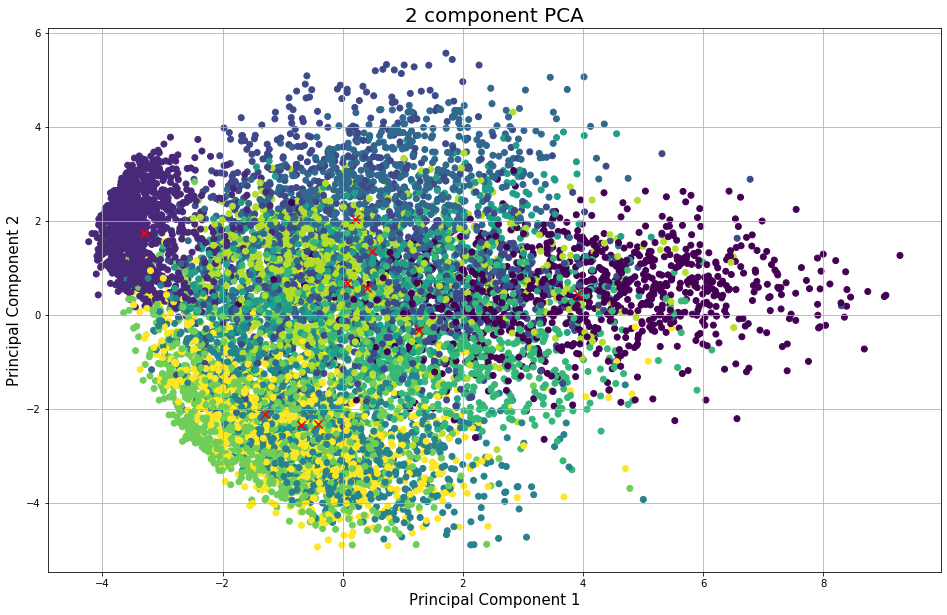

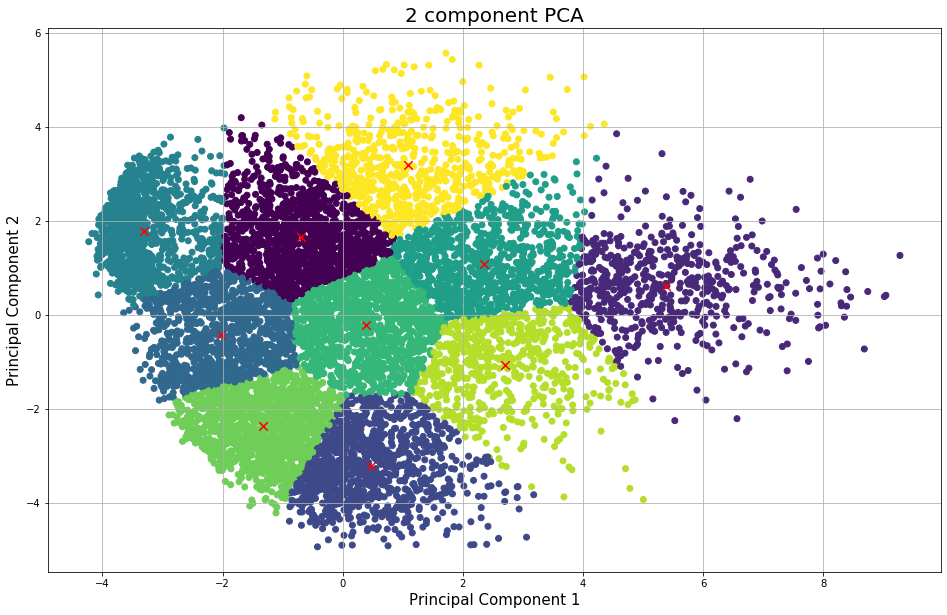

In [41]:
if __name__ == "__main__":
    
    # load data
    mnist = loadMNIST()
    
    # obtain testing dataset
    test_image, test_label = mnist.test.images, mnist.test.labels
    
    # kmeans algorithm
    kmeans(test_image, test_label)
    
    # reduce dimension by using pca
    pca = PCA(n_components=2)
    X_pca = pca.fit(test_image).transform(test_image)

    # calculate centroid of every digit
    centroids = []
    for i in range(10):
        index = np.where(test_label == i)
        centroids.append(np.mean(X_pca[index],axis=0))
        
    # origin distribution
    plot_distribution(X_pca, test_label,np.array(centroids))
    
    # reduce dimension by using pca, before kmeans
    reduced_data = PCA(n_components=2).fit_transform(test_image)
    kmeans = cluster.KMeans(n_clusters=10, n_init=10)
    kmeans.fit(reduced_data)
    centroids = kmeans.cluster_centers_
    
    # distribution after kmeans
    plot_distribution(reduced_data, kmeans.labels_, centroids)